# xclara dataset

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [3]:
data

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


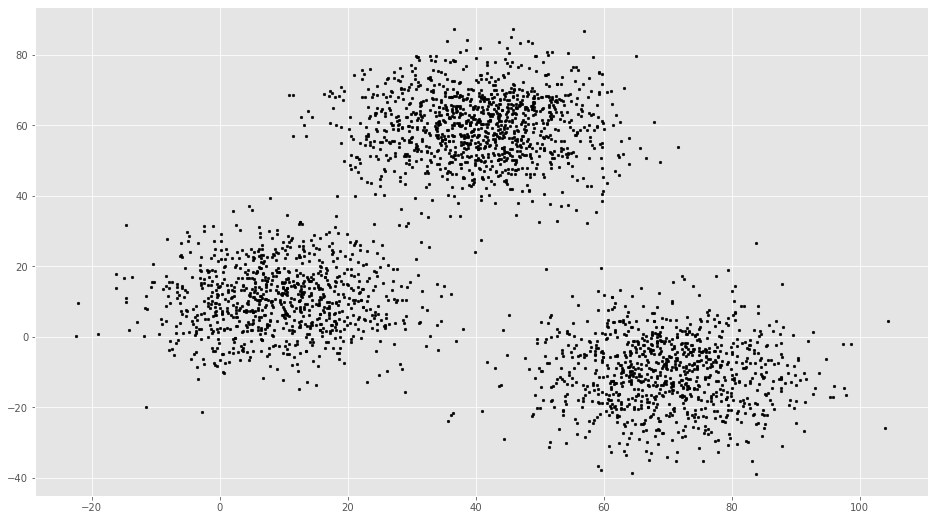

In [4]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [5]:
f1

array([ 2.072345, 17.93671 ,  1.083576, ..., 64.46532 , 90.72282 ,
       64.87976 ])

In [6]:
f2

array([ -3.241693,  15.78481 ,   7.319176, ..., -10.50136 , -12.25584 ,
       -24.87731 ])

In [7]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [8]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [9]:
#Step-1 Randomly picking up the centroids
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
print(" x coordinates" +'\n', C_x)
print("*****")
print(" y coordinates" +'\n', C_y) 
print("*****")

 x coordinates
 [ 2 23 58]
*****
 y coordinates
 [47 37  1]
*****


In [10]:
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Coordinates pair x,y associated inside list to" +'\n', "INITIALIZE RANDOM CENTROIDS" +'\n', C)

Coordinates pair x,y associated inside list to
 INITIALIZE RANDOM CENTROIDS
 [[ 2. 47.]
 [23. 37.]
 [58.  1.]]


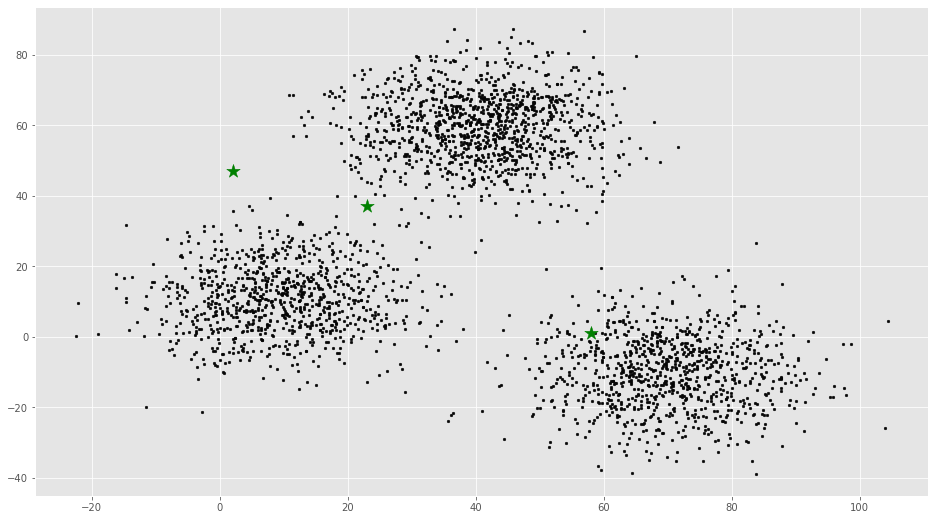

In [11]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [12]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
                          
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)

   # Finding the new centroids by taking the average value
  
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [13]:
len(X)

3000

In [14]:
clusters

array([0., 0., 0., ..., 2., 2., 2.])

In [15]:
C

array([[  9.478045,  10.686052],
       [ 40.683628,  59.715893],
       [ 69.92419 , -10.119641]], dtype=float32)

In [16]:
error

0.0

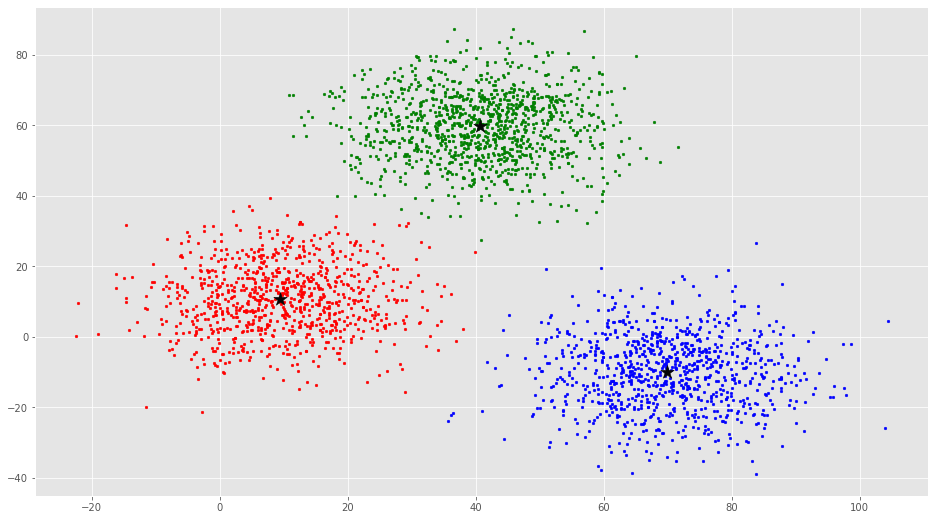

In [17]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# The scikit-learn approach

In [18]:
from sklearn.cluster import KMeans

In [19]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [20]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [21]:
centroids

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

In [22]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[  9.478045  10.686052]
 [ 40.683628  59.715893]
 [ 69.92419  -10.119641]]
[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


# Another example

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

In [24]:
X

array([[-4.3313033 , -6.00240993,  0.67456803],
       [-2.97664229, -3.1764652 ,  2.32679238],
       [ 1.17468193, -9.22544325,  7.83808004],
       ...,
       [-2.12351168, -4.82973352,  2.00298324],
       [ 4.37353562, -8.16226796,  8.62911446],
       [-2.89652551, -5.9297822 ,  1.52986897]])

In [25]:
y

array([3, 3, 2, 2, 2, 0, 1, 3, 0, 0, 1, 0, 1, 1, 0, 3, 3, 1, 0, 3, 1, 0,
       0, 2, 0, 1, 2, 3, 3, 2, 2, 1, 1, 0, 2, 2, 0, 3, 3, 1, 1, 1, 3, 0,
       0, 0, 2, 0, 1, 3, 2, 3, 3, 3, 3, 1, 1, 0, 3, 0, 0, 0, 3, 0, 1, 2,
       3, 3, 1, 3, 3, 0, 2, 2, 0, 0, 1, 3, 2, 3, 2, 0, 3, 0, 1, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0,
       3, 3, 2, 0, 0, 1, 0, 3, 2, 3, 2, 3, 0, 0, 3, 2, 0, 3, 3, 0, 1, 2,
       1, 3, 0, 0, 0, 2, 0, 1, 3, 1, 2, 3, 1, 0, 2, 2, 0, 1, 1, 0, 1, 3,
       0, 0, 2, 3, 0, 2, 1, 0, 1, 2, 2, 3, 1, 2, 0, 2, 0, 1, 2, 2, 1, 0,
       2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 3, 3, 3, 0, 0, 0, 2, 2, 1, 3, 2,
       3, 1, 3, 0, 1, 2, 0, 3, 1, 3, 2, 0, 3, 0, 2, 1, 2, 0, 3, 2, 2, 1,
       2, 1, 2, 3, 0, 2, 3, 0, 1, 2, 1, 3, 3, 2, 2, 1, 2, 3, 0, 0, 0, 1,
       0, 2, 3, 1, 0, 0, 0, 1, 3, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 3,
       1, 0, 3, 0, 1, 0, 0, 3, 0, 2, 1, 1, 1, 2, 1, 3, 2, 3, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 3, 0, 3, 3, 1, 0, 2, 3, 0, 3,

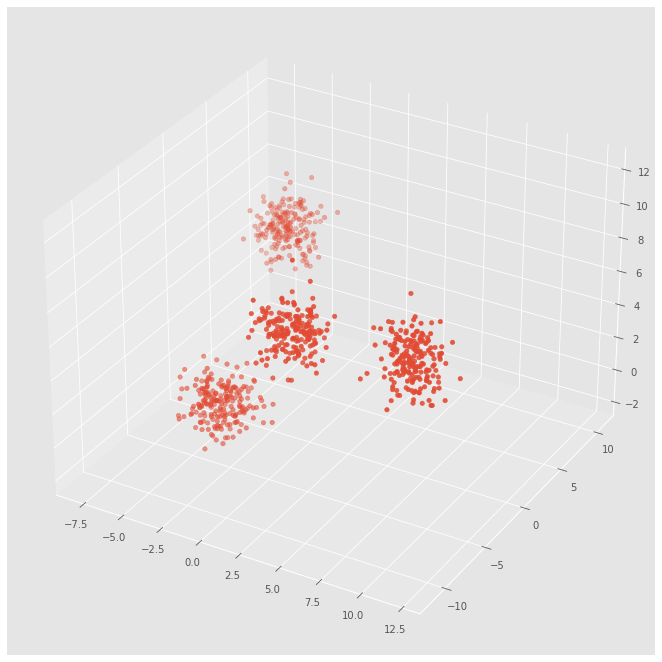

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [27]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [28]:
C

array([[ 9.6725675 , -6.47321173,  7.69227993],
       [-3.00556873, -5.07022898,  0.98378328],
       [-5.72768696,  8.01724912,  5.41710762],
       [ 3.07487863, -7.79893701,  8.07177618]])

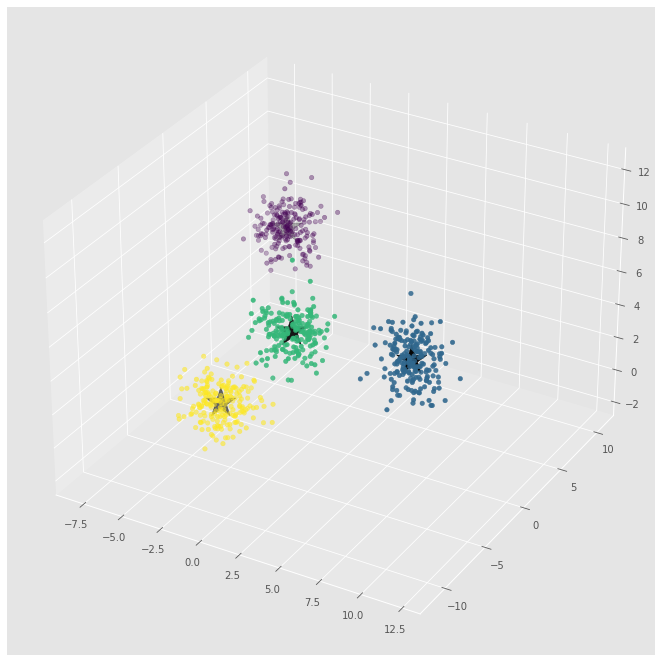

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

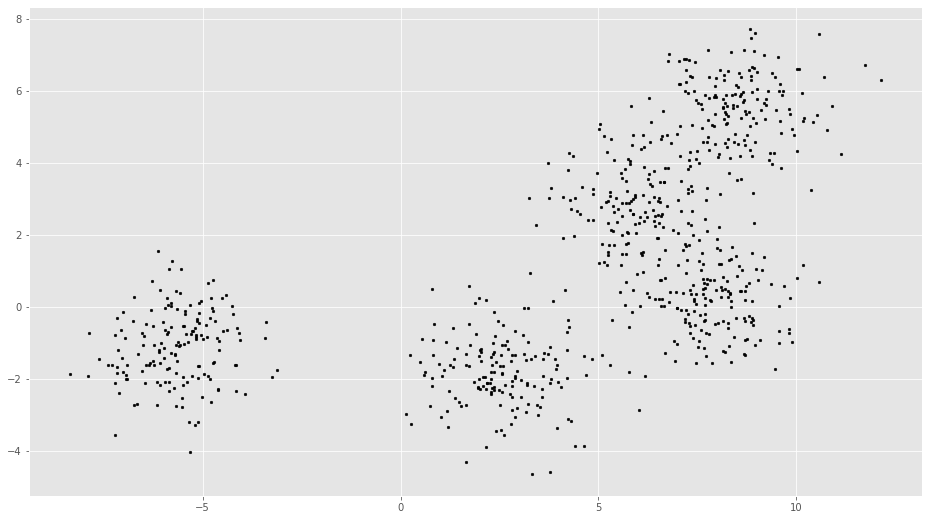

In [30]:
# Creating a sample dataset with 5 clusters
X1, y1 = make_blobs(n_samples=800, n_features=3, centers=5)
plt.scatter(X1[:,0], X1[:,1], c='black', s=7)

In [31]:
# Initializing KMeans
kmeans1 = KMeans(n_clusters=5)
# Fitting with inputs
kmeans1 = kmeans1.fit(X1)
# Predicting the clusters
labels1 = kmeans1.predict(X1)
# Getting the cluster centers
C1 = kmeans1.cluster_centers_

In [32]:
C1

array([[ 2.5383007 , -1.82537341, -2.40269815],
       [ 7.88303145,  0.13706237,  8.52555982],
       [ 8.57474084,  5.57334912, -6.05543115],
       [-5.66109856, -1.12115316, -1.76668086],
       [ 5.93942038,  2.86173388,  5.73279793]])

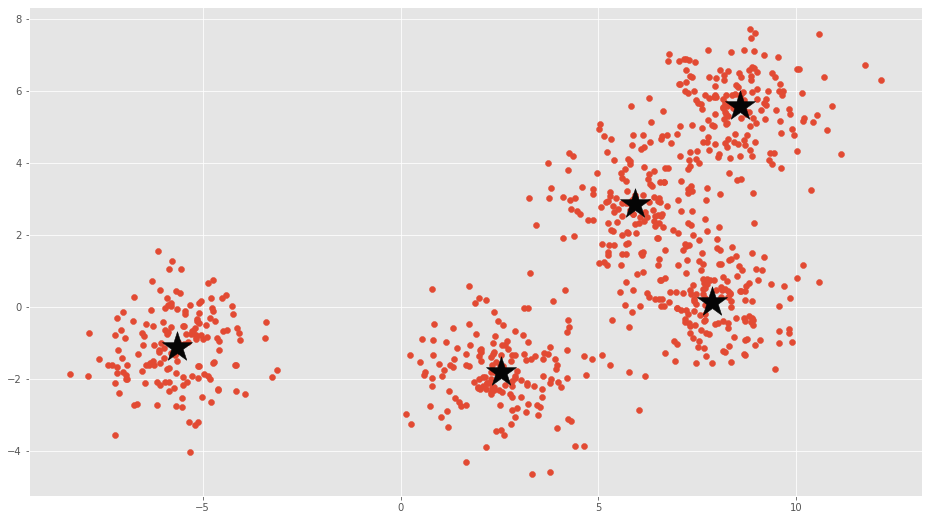

In [33]:
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(C1[:, 0], C1[:, 1], marker='*', c='#050505', s=1000)

In [34]:
X1

array([[ 9.63889755,  5.87930174, -6.57456397],
       [ 8.58454271,  5.8556588 , -6.52846015],
       [ 8.3566897 , -1.53791822,  8.18608343],
       ...,
       [-5.11065531, -3.20210445, -1.45730516],
       [-5.87065709, -0.70211297, -1.38187718],
       [ 7.08412812,  2.66932621,  6.01650339]])

In [35]:
y1

array([2, 2, 3, 2, 2, 3, 4, 0, 3, 0, 4, 1, 3, 4, 3, 1, 1, 1, 0, 3, 1, 0,
       2, 2, 3, 1, 4, 1, 3, 3, 2, 4, 2, 0, 0, 2, 1, 0, 1, 2, 0, 3, 2, 0,
       1, 1, 0, 1, 4, 1, 2, 0, 2, 3, 3, 1, 2, 1, 4, 4, 2, 0, 0, 1, 3, 0,
       4, 2, 2, 1, 4, 4, 0, 4, 1, 3, 2, 4, 1, 4, 0, 2, 1, 3, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 3, 4, 4, 3, 2, 3, 0, 1, 3, 4, 4, 1, 2, 4, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 2, 1, 2, 4, 3, 3, 3, 1, 3, 2, 1, 3, 0, 4, 2, 4,
       4, 2, 0, 3, 3, 1, 0, 0, 1, 0, 2, 1, 0, 3, 1, 0, 0, 1, 1, 0, 2, 2,
       0, 3, 4, 1, 2, 0, 0, 3, 0, 0, 0, 0, 2, 2, 3, 3, 3, 1, 2, 4, 3, 4,
       0, 1, 2, 1, 1, 1, 3, 1, 1, 4, 3, 4, 4, 1, 4, 2, 2, 2, 3, 0, 2, 2,
       1, 0, 2, 2, 0, 4, 2, 1, 1, 1, 0, 2, 1, 1, 4, 4, 1, 2, 2, 2, 0, 0,
       4, 2, 4, 4, 3, 1, 4, 2, 3, 4, 3, 2, 3, 2, 2, 3, 3, 1, 0, 1, 0, 2,
       2, 4, 2, 1, 1, 4, 4, 0, 3, 0, 0, 4, 3, 3, 1, 2, 4, 1, 3, 0, 3, 1,
       3, 1, 2, 3, 3, 3, 1, 1, 2, 1, 4, 1, 4, 4, 3, 3, 1, 3, 2, 4, 2, 2,
       4, 0, 4, 2, 3, 2, 2, 0, 3, 2, 1, 2, 4, 3, 0,